<a href="https://colab.research.google.com/github/saks0106/Frequent-Lookouts/blob/main/Numerical2Categorical_Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binning/Discretization

Transforming Continous Variables into Discrete variables by creating a set of continous intervals that span the range of varibale's values. Intervals are bins

1. Used to handle Outliers - Extreme outliers will fall into 1st or last bin

2. Improve value spread 

Types: 

**Unsupervised:**  Equal width (uniform) , Equal freq (quantile) default , 


KMeans ( when cluster of values have a large gap like 0-15 then 45-50). Normal KMeans for binning 

**Supervised:**  Decision Tree 


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer #for binning
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:

clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:

accuracy_score(y_test,y_pred)

0.6433566433566433

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330790297339594

Using Binning

In [23]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile') #encode can also be OHE but not used frequently
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='uniform')

In [24]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [25]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [26]:
trf.named_transformers_['first'].n_bins_ #15 bins are created for age using quantile stragegy

array([15])

In [27]:
trf.named_transformers_['second'].bin_edges_ #16 bins as strategy is uniform

array([array([  0.     ,  34.15528,  68.31056, 102.46584, 136.62112, 170.7764 ,
              204.93168, 239.08696, 273.24224, 307.39752, 341.5528 , 375.70808,
              409.86336, 444.01864, 478.17392, 512.3292 ])                     ],
      dtype=object)

In [28]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0], #represents in which bin value lie
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [29]:
output

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,0.0
73,26.0,6.0,14.4542,0.0
253,30.0,8.0,16.1000,0.0
719,33.0,9.0,7.7750,0.0
666,25.0,6.0,13.0000,0.0
...,...,...,...,...
92,46.0,12.0,61.1750,1.0
134,25.0,6.0,13.0000,0.0
337,41.0,11.0,134.5000,3.0
548,33.0,9.0,20.5250,0.0


In [30]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

#pd.cut is used for binning purpose

In [31]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
845,42.0,12.0,7.5500,0.0,"(38.0, 42.0]","(0.0, 34.155]"
192,19.0,3.0,7.8542,0.0,"(16.0, 19.0]","(0.0, 34.155]"
583,36.0,10.0,40.1250,1.0,"(35.0, 38.0]","(34.155, 68.311]"
342,28.0,7.0,13.0000,0.0,"(25.0, 28.0]","(0.0, 34.155]"
796,49.0,13.0,25.9292,0.0,"(47.0, 54.0]","(0.0, 34.155]"


In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [33]:
accuracy_score(y_test,y_pred2)

0.6013986013986014

In [34]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6358763693270735

In [35]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6316705790297339


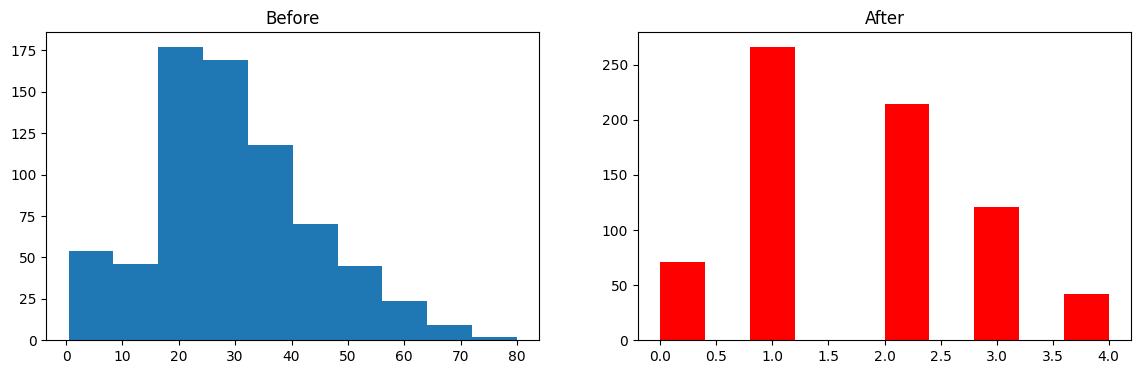

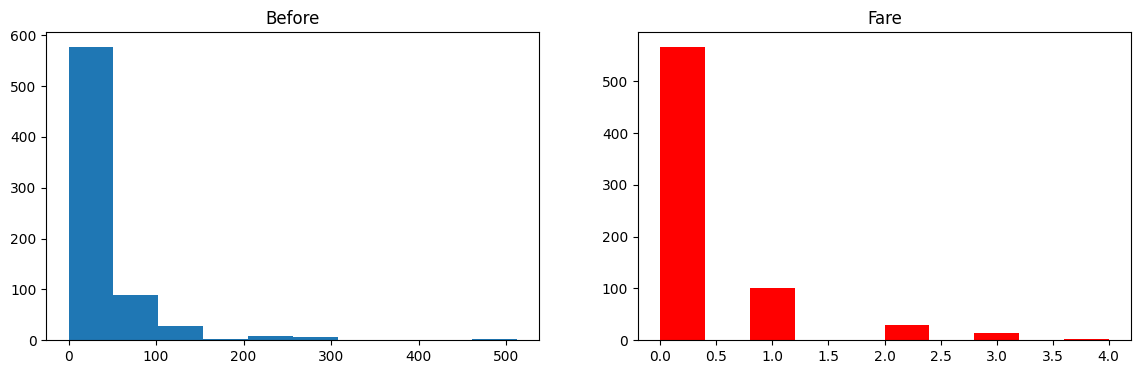

In [37]:
discretize(5,'kmeans')

0.6275430359937403


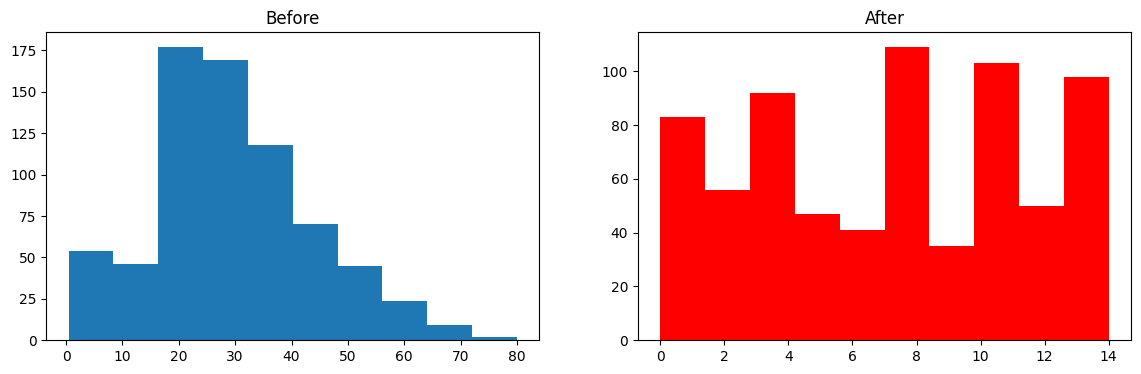

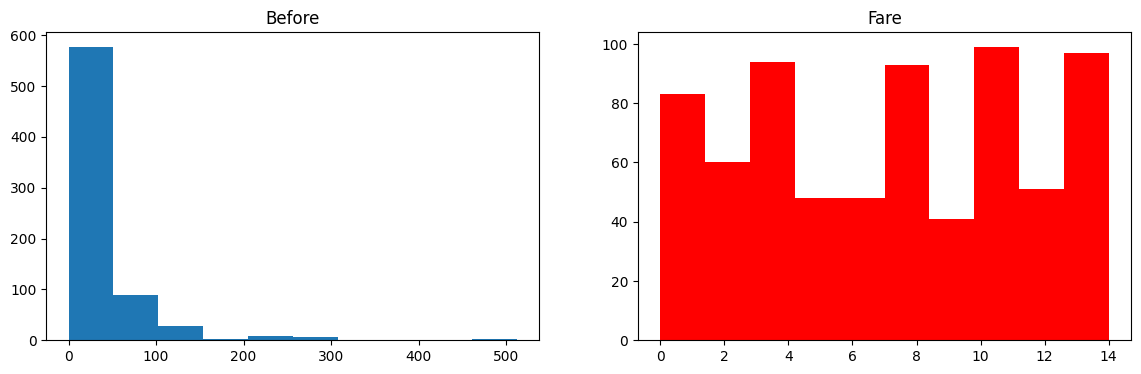

In [36]:
discretize(15,'quantile')